<a href="https://colab.research.google.com/github/bedhinesh/capstone-aiml/blob/rohan/Capstone_Regression_densenetModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
project_path = r'/content/drive/MyDrive/CapstoneProject/Data/'

In [ ]:
TRAIN_CSV = project_path + "df_train.csv"
TEST_CSV = project_path + "df_test.csv"
DATASET_FOLDER_TRAIN = project_path +"car_data/car_data/train/"
DATASET_FOLDER_TEST = "car_data/car_data/test/"
IMAGE_SIZE = 128 # Image sizes can vary (128, 160, 192, 224). MobileNetV2 can also take 96

In [ ]:
import pandas as pd
import numpy as np
import csv
df_train = pd.read_csv('/content/drive/MyDrive/CapstoneProject/Data/df_train.csv',index_col=0) 

In [ ]:
df_train = df_train.drop(['Image','Car_name','Car_type','Year'], axis=1) #dropping Image,carname, cartype,year column


In [ ]:

df_train.head()

,x0,y0,x1,y1,Car_ref,File_loc,Height,Width
0,39,116,569,375,14,/content/drive/MyDrive/CapstoneProject/Data/ca...,400,600
1,36,116,868,587,3,/content/drive/MyDrive/CapstoneProject/Data/ca...,675,900
2,85,109,601,381,91,/content/drive/MyDrive/CapstoneProject/Data/ca...,480,640
3,621,393,1484,1096,134,/content/drive/MyDrive/CapstoneProject/Data/ca...,1386,2100
4,14,36,133,99,106,/content/drive/MyDrive/CapstoneProject/Data/ca...,108,144


In [ ]:
  y_train = np.zeros((df_train.shape[0], 4))
  X_train = []
  for index in df_train.index: 
     y_train[index, 0] = df_train['x0'][index] * IMAGE_SIZE / df_train['Width'][index]                 # Normalize bounding box by image size
     y_train[index, 1] = df_train['y0'][index] * IMAGE_SIZE / df_train['Height'][index]               # Normalize bounding box by image size
     y_train[index, 2] = (df_train['x1'][index]-df_train['x0'][index]) * IMAGE_SIZE / df_train['Width'][index]        # Normalize bounding box by image size
     y_train[index, 3] = (df_train['y1'][index]-df_train['y0'][index]) * IMAGE_SIZE / df_train['Height'][index] # Normalize bounding box by image size
     #y_train[index, 4] = int(df_train['Car_ref'][index])

     X_train.append(df_train['File_loc'][index])


In [ ]:
X_train[:5]

['/content/drive/MyDrive/CapstoneProject/Data/car_data/car_data/train/Audi TTS Coupe 2012/00001.jpg',
 '/content/drive/MyDrive/CapstoneProject/Data/car_data/car_data/train/Acura TL Sedan 2012/00002.jpg',
 '/content/drive/MyDrive/CapstoneProject/Data/car_data/car_data/train/Dodge Dakota Club Cab 2007/00003.jpg',
 '/content/drive/MyDrive/CapstoneProject/Data/car_data/car_data/train/Hyundai Sonata Hybrid Sedan 2012/00004.jpg',
 '/content/drive/MyDrive/CapstoneProject/Data/car_data/car_data/train/Ford F-450 Super Duty Crew Cab 2012/00005.jpg']

/content/drive/MyDrive/CapstoneProject/Data/car_data/car_data/train/Cadillac CTS-V Sedan 2012/00098.jpg


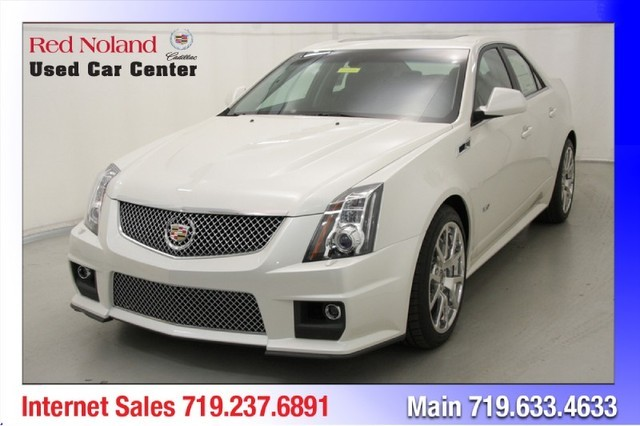

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
# Pick a random image to check how it looks
filename = X_train[97]
print(filename)
unscaled = cv2.imread(filename)

cv2_imshow(unscaled) 

region = y_train[97]
image_height, image_width, _ = unscaled.shape
x0 = int(region[0] * image_width / IMAGE_SIZE) # Scale the BBox
y0 = int(region[1] * image_height / IMAGE_SIZE)

x1 = int((region[0] + region[2]) * image_width / IMAGE_SIZE)
y1 = int((region[1] + region[3]) * image_height / IMAGE_SIZE)

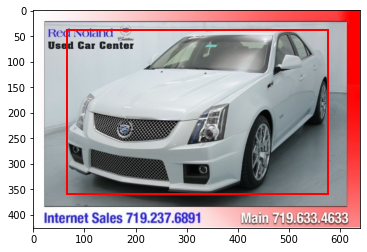

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
from google.colab.patches import cv2_imshow
# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(unscaled)

# Create a Rectangle patch
rect = patches.Rectangle((x0, y0), x1 - x0, y1 - y0, linewidth=2, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

Data preparation

In [ ]:
"""from PIL import Image
from tensorflow.keras.applications.mobilenet import preprocess_input
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
from google.colab.patches import cv2_imshow

for i, f in enumerate(X_train):
  img = Image.open(f) # Read image
  img = img.resize((IMAGE_SIZE, IMAGE_SIZE)) # Resize image
  img = img.convert('RGB')

  X_train[i] = preprocess_input(np.array(img, dtype=np.float32)) # Convert to float32 array
  img.close()"""

"from PIL import Image\nfrom tensorflow.keras.applications.mobilenet import preprocess_input\nimport matplotlib.pyplot as plt\nimport matplotlib.patches as patches\nimport cv2\nfrom google.colab.patches import cv2_imshow\n\nfor i, f in enumerate(X_train):\n  img = Image.open(f) # Read image\n  img = img.resize((IMAGE_SIZE, IMAGE_SIZE)) # Resize image\n  img = img.convert('RGB')\n\n  X_train[i] = preprocess_input(np.array(img, dtype=np.float32)) # Convert to float32 array\n  img.close()"

In [ ]:
#X_train = np.array(X_train)

In [ ]:
"""from pickle import dump
# save the model
dump(X_train, open('/content/drive/MyDrive/CapstoneProject/Pickles/X_train96.pkl', 'wb'))"""

"from pickle import dump\n# save the model\ndump(X_train, open('/content/drive/MyDrive/CapstoneProject/Pickles/X_train96.pkl', 'wb'))"

In [ ]:
from pickle import load   ##load from existing
X_train=load(open('/content/drive/MyDrive/CapstoneProject/Pickles/X_train.pkl', 'rb'))

In [ ]:
X_train.shape

(8144, 128, 128, 3)

In [ ]:
y_train

array([[  8.32      ,  37.12      , 113.06666667,  82.88      ],
       [  5.12      ,  21.99703704, 118.32888889,  89.31555556],
       [ 17.        ,  29.06666667, 103.2       ,  72.53333333],
       ...,
       [  4.43733333,  67.13859275, 108.20266667,  55.40298507],
       [  6.24      ,  63.10028116, 112.88      ,  45.82567948],
       [  2.89920725,  44.97803807, 122.05662514,  81.89751098]])

In [ ]:
y_train.shape

(8144, 4)

In [ ]:

df_test = pd.read_csv('/content/drive/MyDrive/CapstoneProject/Data/df_test.csv',index_col=0) 

In [ ]:
df_test = df_test.drop(['Image','Car_name','Car_type','Year'], axis=1) #dropping Image,carname, cartype,year column

In [ ]:
df_test.head()

,x0,y0,x1,y1,Car_ref,File_loc,Height,Width
0,30,52,246,147,181,/content/drive/MyDrive/CapstoneProject/Data/ca...,182,276
1,100,19,576,203,103,/content/drive/MyDrive/CapstoneProject/Data/ca...,360,640
2,51,105,968,659,145,/content/drive/MyDrive/CapstoneProject/Data/ca...,741,1024
3,67,84,581,407,187,/content/drive/MyDrive/CapstoneProject/Data/ca...,480,640
4,140,151,593,339,185,/content/drive/MyDrive/CapstoneProject/Data/ca...,373,600


In [ ]:
  y_test = np.zeros((df_test.shape[0], 4))
  X_test = []
  for index in df_test.index: 
     y_test[index, 0] = df_test['x0'][index] * IMAGE_SIZE / df_test['Width'][index]                 # Normalize bounding box by image size
     y_test[index, 1] = df_test['y0'][index] * IMAGE_SIZE / df_test['Height'][index]               # Normalize bounding box by image size
     y_test[index, 2] = (df_test['x1'][index]-df_test['x0'][index]) * IMAGE_SIZE / df_test['Width'][index]        # Normalize bounding box by image size
     y_test[index, 3] = (df_test['y1'][index]-df_test['y0'][index]) * IMAGE_SIZE / df_test['Height'][index] # Normalize bounding box by image size
     #y_test[index, 4] = int(df_test['Car_ref'][index])

     X_test.append(df_test['File_loc'][index])

In [ ]:
X_test[:5]

['/content/drive/MyDrive/CapstoneProject/Data/car_data/car_data/test/Suzuki Aerio Sedan 2007/00001.jpg',
 '/content/drive/MyDrive/CapstoneProject/Data/car_data/car_data/test/Ferrari 458 Italia Convertible 2012/00002.jpg',
 '/content/drive/MyDrive/CapstoneProject/Data/car_data/car_data/test/Jeep Patriot SUV 2012/00003.jpg',
 '/content/drive/MyDrive/CapstoneProject/Data/car_data/car_data/test/Toyota Camry Sedan 2012/00004.jpg',
 '/content/drive/MyDrive/CapstoneProject/Data/car_data/car_data/test/Tesla Model S Sedan 2012/00005.jpg']

In [ ]:
"""for i, f in enumerate(X_test):
  img = Image.open(f) 
  img = img.resize((IMAGE_SIZE, IMAGE_SIZE)) # Resize image
  img = img.convert('RGB')

  X_test[i] = preprocess_input(np.array(img, dtype=np.float32)) # Convert to float32 array
  img.close()"""

"for i, f in enumerate(X_test):\n  img = Image.open(f) \n  img = img.resize((IMAGE_SIZE, IMAGE_SIZE)) # Resize image\n  img = img.convert('RGB')\n\n  X_test[i] = preprocess_input(np.array(img, dtype=np.float32)) # Convert to float32 array\n  img.close()"

In [ ]:
"""X_test = np.array(X_test)"""
X_test=load(open('/content/drive/MyDrive/CapstoneProject/Pickles/X_test.pkl', 'rb'))

In [ ]:
#dump(X_test, open('/content/drive/MyDrive/CapstoneProject/Pickles/X_test96.pkl', 'wb'))

In [ ]:
#from pickle import load   ##load from existing
#X_test=load(open('X_test.pkl', 'rb'))

In [ ]:
X_test.shape

(8041, 128, 128, 3)

In [ ]:
y_test

array([[ 13.91304348,  36.57142857, 100.17391304,  66.81318681],
       [ 20.        ,   6.75555556,  95.2       ,  65.42222222],
       [  6.375     ,  18.13765182, 114.625     ,  95.6977058 ],
       ...,
       [  6.6519685 ,  11.40594059, 114.69606299,  95.04950495],
       [  6.6       ,  42.56674473,  97.6       ,  70.14519906],
       [ 15.4       ,  21.9342723 ,  85.8       ,  92.24413146]])

In [ ]:
y_test.shape

(8041, 4)

Model Creation

In [ ]:

from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Reshape

ALPHA = 1.0 # Width hyper parameter  Higher width means more accurate but slower

def create_model(trainable=True):
    model = DenseNet121(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), include_top=False) # Load pre-trained mobilenet
    # Do not include classification (top) layer

    # to freeze layers, except the new top layer, of course, which will be added below
    for layer in model.layers:
        layer.trainable = trainable

    # Add new top layer which is a conv layer of the same size as the previous layer so that only 4 coords of BBox can be output
    x0 = model.layers[-1].output
    x1 = Conv2D(4, kernel_size=4, name="coords")(x0)
    # In the line above kernel size should be 3 for img size 96, 4 for img size 128, 5 for img size 160 etc.
    x2 = Reshape((4,))(x1) # These are the 4 predicted coordinates of one BBox

    return Model(inputs=model.input, outputs=x2)

Evaluation Metrics

In [ ]:
def IOU(y_true, y_pred):
    intersections = 0
    unions = 0
    # set the types so we are sure what type we are using

    gt = y_true
    pred = y_pred
    # Compute interection of predicted (pred) and ground truth (gt) bounding boxes
    diff_width = np.minimum(gt[:,0] + gt[:,2], pred[:,0] + pred[:,2]) - np.maximum(gt[:,0], pred[:,0])
    diff_height = np.minimum(gt[:,1] + gt[:,3], pred[:,1] + pred[:,3]) - np.maximum(gt[:,1], pred[:,1])
    intersection = diff_width * diff_height

    # Compute union
    area_gt = gt[:,2] * gt[:,3]
    area_pred = pred[:,2] * pred[:,3]
    union = area_gt + area_pred - intersection

    # Compute intersection and union over multiple boxes
    for j, _ in enumerate(union):
      if union[j] > 0 and intersection[j] > 0 and union[j] >= intersection[j]:
        intersections += intersection[j]
        unions += union[j]

    # Compute IOU. Use epsilon to prevent division by zero
    iou = np.round(intersections / (unions + tensorflow.keras.backend.epsilon()), 4)
    # This must match the type used in py_func
    iou = iou.astype(np.float32)
    return iou

In [ ]:
def IoU(y_true, y_pred):
    iou = tensorflow.py_function(IOU, [y_true, y_pred], Tout=tensorflow.float32)
    return iou

Initialize model and Model Summary

In [ ]:
model = create_model() # Arg is False, if you want to freeze lower layers for fast training (but low accuracy)
model.summary() # Print summary

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 64, 64, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1/conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
# Compile the model
model.compile(loss="mean_squared_error", optimizer="adam", metrics=[IoU]) # Regression loss is MSE

Compile Model

In [ ]:
import tensorflow
# Use earlystopping
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_IoU', patience=5, min_delta=0.01)

# Fit the model
model.fit(X_train, y_train, validation_split=.2, epochs=15, batch_size=32, callbacks=[callback])

Epoch 1/15
204/204 [==============================] - 86s 206ms/step - loss: 412.9417 - IoU: 0.7148 - val_loss: 47.1934 - val_IoU: 0.8044
Epoch 2/15
204/204 [==============================] - 37s 180ms/step - loss: 23.1475 - IoU: 0.8726 - val_loss: 31.5173 - val_IoU: 0.8744
Epoch 3/15
204/204 [==============================] - 37s 181ms/step - loss: 19.3730 - IoU: 0.8907 - val_loss: 32.7474 - val_IoU: 0.8433
Epoch 4/15
204/204 [==============================] - 37s 181ms/step - loss: 13.7327 - IoU: 0.9089 - val_loss: 22.5805 - val_IoU: 0.8586
Epoch 5/15
204/204 [==============================] - 37s 181ms/step - loss: 13.5919 - IoU: 0.9094 - val_loss: 54.5852 - val_IoU: 0.8418
Epoch 6/15
204/204 [==============================] - 37s 181ms/step - loss: 21.8828 - IoU: 0.8905 - val_loss: 35.9317 - val_IoU: 0.8382


In [ ]:
model.save('/content/drive/MyDrive/CapstoneProject/tmp/densenetreg121/densenet_regression.h5')

Final Loss and accuracy

In [ ]:
model.evaluate(X_test, y_test)

252/252 [==============================] - 22s 88ms/step - loss: 38.3270 - IoU: 0.8373


[38.32698059082031, 0.8373282551765442]

Test Model

In [ ]:
# Pick a test image, run model, show image, and show predicted bounding box overlaid on the image
from tensorflow.keras.applications.mobilenet import preprocess_input
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
from google.colab.patches import cv2_imshow
filename = '/content/drive/MyDrive/CapstoneProject/Data/car_data/car_data/test/Mercedes-Benz S-Class Sedan 2012/00008.jpg'

unscaled = cv2.imread(filename) # Original image for display

In [ ]:
image_height, image_width, _ = unscaled.shape
image = cv2.resize(unscaled, (IMAGE_SIZE, IMAGE_SIZE)) # Rescaled image to run the network
feat_scaled = preprocess_input(np.array(image, dtype=np.float32))
print ("Size of original input: ", image.shape)
print("-------------------------------")
print("Size of scaled input: ", feat_scaled.shape)

Size of original input:  (128, 128, 3)
-------------------------------
Size of scaled input:  (128, 128, 3)


In [ ]:
region = model.predict(x=np.array([feat_scaled]))[0] # Predict the BBox

Fetching coordinates details

In [ ]:
x0 = int(region[0] * image_width / IMAGE_SIZE) # Scale the BBox
y0 = int(region[1] * image_height / IMAGE_SIZE)

x1 = int((region[0] + region[2]) * image_width / IMAGE_SIZE)
y1 = int((region[1] + region[3]) * image_height / IMAGE_SIZE)

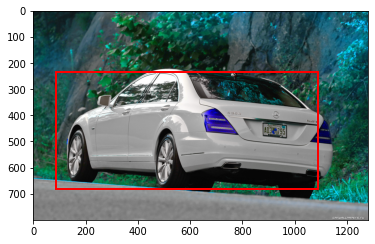

In [ ]:
# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(unscaled)

# Create a Rectangle patch
rect = patches.Rectangle((x0, y0), x1 - x0, y1 - y0, linewidth=2, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()

/content/drive/MyDrive/CapstoneProject/Data/car_data/car_data/test/Nissan Juke Hatchback 2012/00027.jpg
Size of original input:  (128, 128, 3)
-------------------------------
Size of scaled input:  (128, 128, 3)
Region:  [  8.743494  37.543076 100.30149   71.694244]


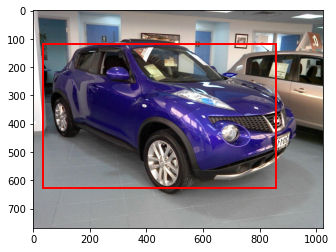

In [ ]:
filename = '/content/drive/MyDrive/CapstoneProject/Data/car_data/car_data/test/Nissan Juke Hatchback 2012/00027.jpg'
print(filename)
unscaled = cv2.imread(filename)
image_height, image_width, _ = unscaled.shape
image = cv2.resize(unscaled, (IMAGE_SIZE, IMAGE_SIZE)) # Rescaled image to run the network
feat_scaled = preprocess_input(np.array(image, dtype=np.float32))
print ("Size of original input: ", image.shape)
print("-------------------------------")
print("Size of scaled input: ", feat_scaled.shape)
print("Region: ", region)
region = model.predict(x=np.array([feat_scaled]))[0] # Predict the BBox
x0 = int(region[0] * image_width / IMAGE_SIZE) # Scale the BBox
y0 = int(region[1] * image_height / IMAGE_SIZE)

x1 = int((region[0] + region[2]) * image_width / IMAGE_SIZE)
y1 = int((region[1] + region[3]) * image_height / IMAGE_SIZE)
# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(unscaled)

# Create a Rectangle patch
rect = patches.Rectangle((x0, y0), x1 - x0, y1 - y0, linewidth=2, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()
